In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# load dataset
conn = sqlite3.connect('inventory.db')
df = pd.read_sql_query('''select * from vendor_sales_summary''',conn)
df.head().T

,0,1,2,3,4
VendorNumber,1128,4425,17035,3960,3960
VendorName,BROWN-FORMAN CORP,MARTIGNETTI COMPANIES,PERNOD RICARD USA,DIAGEO NORTH AMERICA INC,DIAGEO NORTH AMERICA INC
Brand,1233,3405,8068,4261,3545
Description,Jack Daniels No 7 Black,Tito's Handmade Vodka,Absolut 80 Proof,Capt Morgan Spiced Rum,Ketel One Vodka
PurchasePrice,26.27,23.19,18.24,16.17,21.89
ActualPrice,36.99,28.99,24.99,22.99,29.99
Volume,1750.0,1750.0,1750.0,1750.0,1750.0
TotalPurchaseQuantity,145080,164038,187407,201682,138109
TotalPurchaseDollars,3811251.6,3804041.22,3418303.68,3261197.94,3023206.01
TotalSalesQuantity,142049.0,160247.0,187140.0,200412.0,135838.0


In [3]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [5]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()
brand_performance = brand_performance[brand_performance['ProfitMargin']>0]

In [6]:
ls = brand_performance['TotalSalesDollars'].quantile(0.15)
hm = brand_performance['ProfitMargin'].quantile(0.85)

In [7]:
print(hm)

65.06402152121017


In [8]:
print(ls)

567.9864999999998


In [9]:
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= ls) &
    (brand_performance['ProfitMargin'] >= hm)
]
display(target_brands.sort_values('ProfitMargin'))

,Description,TotalSalesDollars,ProfitMargin
5962,McCormick Cherry Vodka,188.73,65.077094
8844,Three Olives Tomato Vodka,314.79,65.246672
3034,Dom Piquemal Cotes du Roussi,359.76,65.510340
9320,Viu Manent Cab Svgn La Capil,167.88,65.511079
5610,Louis Jadot Chmble-Musgny 11,99.98,65.513103
...,...,...,...
5736,Mad Dogs & Englishmen Jumil,279.80,97.666190
7,12 Days of Pearls Gift Set,309.69,97.678323
2291,Chi Chi's Chocolate Malt RTD,461.58,98.110837
572,Bacardi Oakheart Spiced Trav,399.60,98.133133


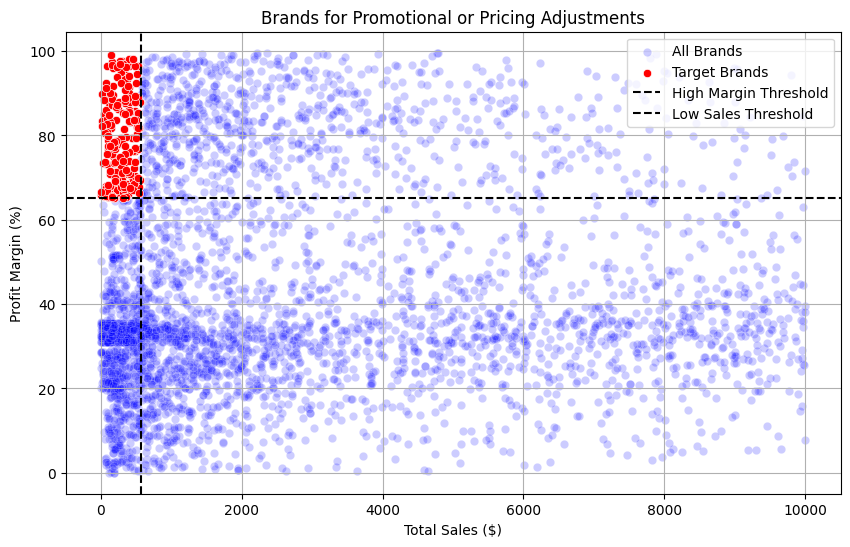

In [10]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',color='blue',label="All Brands",alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color='red',label="Target Brands")
plt.axhline(hm,linestyle='--',color='black',label='High Margin Threshold')
plt.axvline(ls,linestyle='--',color='black',label='Low Sales Threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
def format_dollars(x):
    if x >= 1_000_000:
        return f"{x/1_000_000:.2f}M"
    elif x >= 1_000:
        return f"{x/1_000:.2f}K"
    else:
        return st(x)

In [12]:
top_vendor = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brand = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendor.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      68.74M
MARTIGNETTI COMPANIES         40.96M
PERNOD RICARD USA             32.28M
JIM BEAM BRANDS COMPANY       31.90M
BACARDI USA INC               25.01M
CONSTELLATION BRANDS INC      24.47M
E & J GALLO WINERY            18.55M
BROWN-FORMAN CORP             18.48M
ULTRA BEVERAGE COMPANY LLP    17.80M
M S WALKER INC                15.44M
Name: TotalSalesDollars, dtype: object

In [13]:
top_brand.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

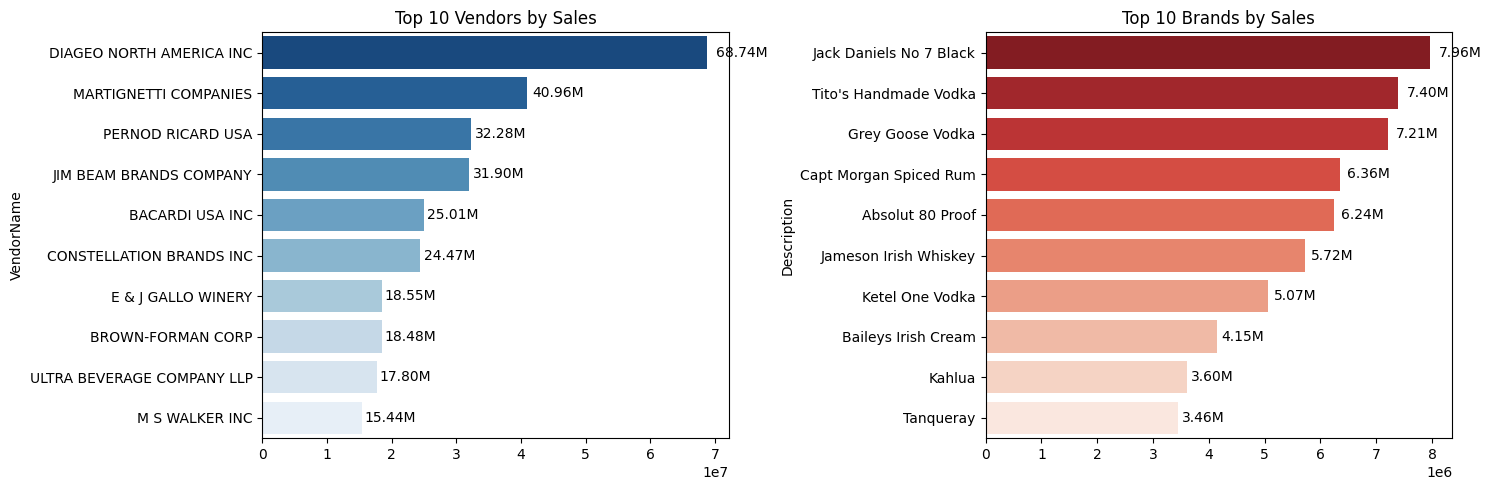

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendor.index,x=top_vendor.values,palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width() * 0.02),
            bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color="black")

plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brand.index,x=top_brand.values,palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width() * 0.02),
            bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color="black")

plt.tight_layout()
plt.show()

In [15]:
# Q 3.

In [16]:
vendor_per = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum'
}).reset_index()
vendor_per

,VendorName,TotalPurchaseDollars
0,AAPER ALCOHOL & CHEMICAL CO,105.07
1,ADAMBA IMPORTS INTL INC,76770.25
2,ALISA CARR BEVERAGES,34951.68
3,ALTAMAR BRANDS LLC,11706.20
4,AMERICAN SPIRITS EXCHANGE,1205.16
...,...,...
123,WEIN BAUER INC,43517.00
124,WESTERN SPIRITS BEVERAGE CO,361249.21
125,WILLIAM GRANT & SONS INC,5960744.35
126,WINE GROUP INC,5258636.79


In [17]:
vendor_per['PurchaseContribution %'] = round((vendor_per['TotalPurchaseDollars']/vendor_per['TotalPurchaseDollars'].sum())*100,2)
top_vendor = vendor_per.sort_values('PurchaseContribution %',ascending=False).head(10)
top_vendor

,VendorName,TotalPurchaseDollars,PurchaseContribution %
28,DIAGEO NORTH AMERICA INC,50959796.85,15.83
63,MARTIGNETTI COMPANIES,27861690.02,8.66
50,JIM BEAM BRANDS COMPANY,24203151.05,7.52
74,PERNOD RICARD USA,24124091.56,7.49
8,BACARDI USA INC,17624378.72,5.48
23,CONSTELLATION BRANDS INC,15573917.90,4.84
14,BROWN-FORMAN CORP,13529433.08,4.20
114,ULTRA BEVERAGE COMPANY LLP,13210613.93,4.10
33,E & J GALLO WINERY,12289608.09,3.82
59,M S WALKER INC,10935817.30,3.40


In [18]:
top_vendor['PurchaseContribution %'].sum()

np.float64(65.34)

In [19]:
top_vendor['Cumulative_Contribution %'] = top_vendor['PurchaseContribution %'].cumsum()
top_vendor

,VendorName,TotalPurchaseDollars,PurchaseContribution %,Cumulative_Contribution %
28,DIAGEO NORTH AMERICA INC,50959796.85,15.83,15.83
63,MARTIGNETTI COMPANIES,27861690.02,8.66,24.49
50,JIM BEAM BRANDS COMPANY,24203151.05,7.52,32.01
74,PERNOD RICARD USA,24124091.56,7.49,39.50
8,BACARDI USA INC,17624378.72,5.48,44.98
23,CONSTELLATION BRANDS INC,15573917.90,4.84,49.82
14,BROWN-FORMAN CORP,13529433.08,4.20,54.02
114,ULTRA BEVERAGE COMPANY LLP,13210613.93,4.10,58.12
33,E & J GALLO WINERY,12289608.09,3.82,61.94
59,M S WALKER INC,10935817.30,3.40,65.34


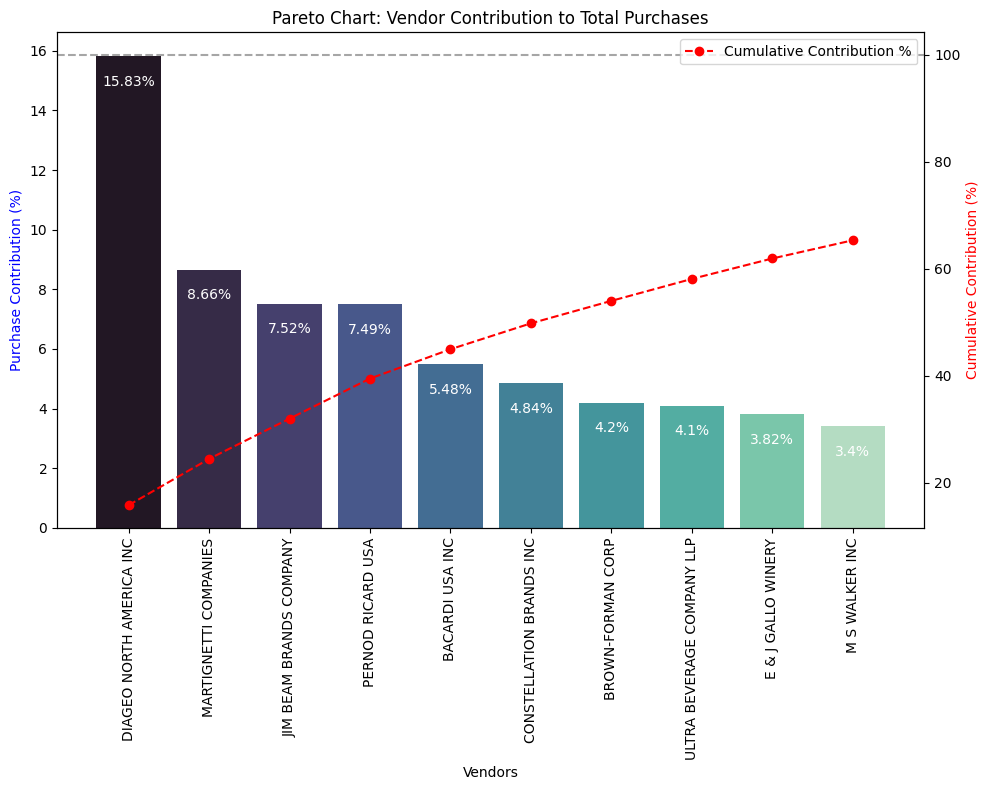

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 8))

# Bar plot for Purchase Contribution %
sns.barplot(
    x=top_vendor['VendorName'], 
    y=top_vendor['PurchaseContribution %'], 
    palette="mako", 
    ax=ax1
)

# Add data labels on bars
for i, value in enumerate(top_vendor['PurchaseContribution %']):
    ax1.text(i, value - 1, f"{value}%", ha='center', fontsize=10, color='white')

# Line plot for Cumulative Contribution %
ax2 = ax1.twinx()
ax2.plot(
    top_vendor['VendorName'], 
    top_vendor['Cumulative_Contribution %'], 
    color='red', 
    marker='o', 
    linestyle="dashed", 
    label='Cumulative Contribution %'
)

# Labeling and formatting
ax1.set_xticklabels(top_vendor['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution (%)', color='blue')
ax2.set_ylabel('Cumulative Contribution (%)', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


# Q 4

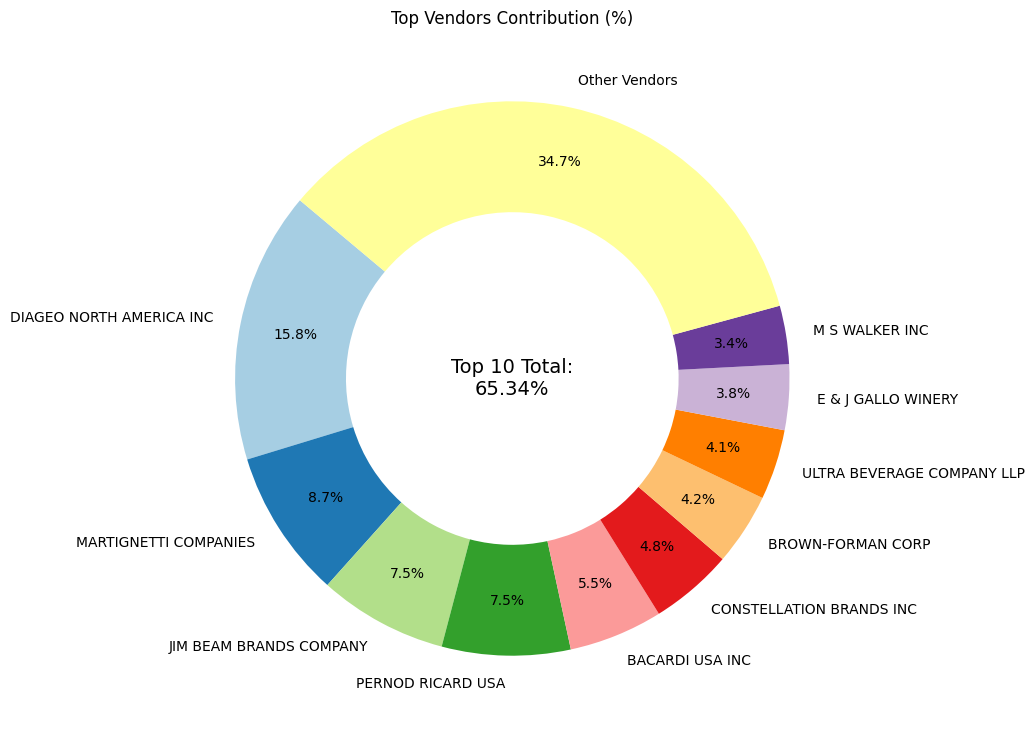

In [21]:
vendors = list(top_vendor['VendorName'].values)
Purchase_Contribution = list(top_vendor['PurchaseContribution %'].values)
total_Contribution = sum(Purchase_Contribution)
remaining_Contribution = 100 - total_Contribution

vendors.append("Other Vendors")
Purchase_Contribution.append(remaining_Contribution)

plt.figure(figsize=(10,9))
plt.pie(Purchase_Contribution,
        labels=vendors,
        autopct='%1.1f%%',
        startangle = 140,
        pctdistance=0.8,
        colors=plt.cm.Paired.colors,
        wedgeprops=dict(width=0.4),
        textprops=dict(color="black")
)
plt.title("Top Vendors Contribution (%)")
plt.text(0,0,f"Top 10 Total:\n{total_Contribution:.2f}%",fontsize=14,ha='center',va='center')
plt.show()

# Q 4.

In [22]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [23]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=["Small","Mediam","Large"])

In [24]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

OrderSize
Small     43.776954
Mediam    17.894005
Large     11.308807
Name: UnitPurchasePrice, dtype: float64

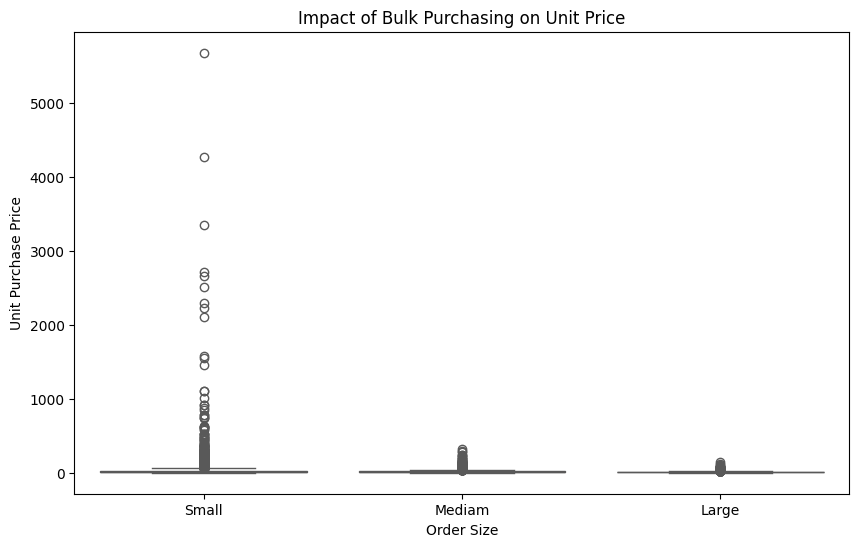

In [25]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice', palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price")
plt.show()

# Which vendor has low inventory turnover, indicating excess stock and slow-moving products?

In [26]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
AAPER ALCOHOL & CHEMICAL CO,0.000000
LAUREATE IMPORTS CO,0.000000
TRUETT HURST,0.041667
"IRA GOLDMAN AND WILLIAMS, LLP",0.075000
HIGHLAND WINE MERCHANTS LLC,0.148920
UNCORKED,0.217238
MILTONS DISTRIBUTING CO,0.236111
VINEYARD BRANDS LLC,0.256241
LOYAL DOG WINERY,0.308333


In [27]:
df['Locked_capital'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
iv = df.groupby('VendorName')[['Locked_capital']].sum().sort_values('Locked_capital', ascending=False).head(10)
iv['Locked_capital'] = iv['Locked_capital'].apply(format_dollars)
iv

,Locked_capital
VendorName,
DIAGEO NORTH AMERICA INC,980.09K
MARTIGNETTI COMPANIES,928.99K
JIM BEAM BRANDS COMPANY,857.80K
ULTRA BEVERAGE COMPANY LLP,780.27K
PERFECTA WINES,571.81K
PERNOD RICARD USA,554.74K
M S WALKER INC,469.96K
WILLIAM GRANT & SONS INC,436.49K
E & J GALLO WINERY,315.20K
